In [1]:
# Objective: Classify the Diabetic and non-diabetic on the basis of given data
#Data structure

#preg: Number of time pregnant
#plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#pres: Diastolic blood pressure (mm Hg)
#skin: Triceps skin fold thickness (mm)
#test: 2-Hour serum insulin (mu U/ml)
#mass: Body mass index (weight in kg/(height in m)^2)
#pedi: Diabetes pedigree function
#age: Age (years)
#class: Class variable (0 or 1)



In [2]:
#Importing key library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
# Importing dataset
pima_df = pd.read_csv('D:\Sumant Data\MySQL\AIML\Sup_Learning\Project\pima-indians-diabetes.data',header=None)

In [4]:
pima_df.columns = ['preg','plas','pres', 'skin','test','mass','pedi','age','class']

In [5]:
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima_df.shape #looking at the shape of data

(768, 9)

In [7]:
pima_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [8]:
#There is no missing values in the data

In [9]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Data Pre-processing, making a deep copy oif dataset
pima_rev = pima_df.copy()


In [11]:
#Descriptive statistic of data
pima_rev.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
#The min values of Glucose, Blood Pressure, Skin, Insulin and BMI are 0, which is practically not possible,
#missing data is replaced by 0.
#Preg: The mean is higher than median & the upper tail is longer than lower tail (difference between 3rd quartile & max)
        #which suggest a long tail towards higher end

In [13]:
print(pima_rev.shape) #looking at the shape of the data
print(pima_rev.size)  #looking at the size of data

(768, 9)
6912


In [14]:
#Applying model on raw data to see the strength
X = pima_rev.drop('class',axis = 1).values
X.shape

(768, 8)

In [15]:
Y = pima_rev['class'].values
Y.shape

(768,)

In [30]:
#Splitting dataset for train test 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [31]:
clt = GaussianNB()

In [32]:
clt.fit(x_train,y_train) #Fitting Gaussian model on raw data
y_predict = clt.predict(x_test)
accuracy_score(y_test,y_predict,normalize=True)

0.7835497835497836

In [33]:

cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[128  18]
 [ 32  53]]


In [34]:
recall_dia = 53/(53+32)*100
print(recall_dia)

62.35294117647059


In [35]:
#Class accuracy of Diabetic class is almost 62.35%, we can try to increase the accuracy by applying transformation

In [36]:
############### Iteration 2 ################

In [37]:
#Using np.isreal function to check the values are numeric
pima_rev[~pima_rev.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [38]:
#Missing value imputation

In [39]:
pima_rev[pima_rev['plas']==0] #There are 5 records with missing plasma value, as data is skewed, we replace it with median

,preg,plas,pres,skin,test,mass,pedi,age,class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [40]:
pima_rev['plas'] = pima_rev.plas.mask(pima_rev.plas==0,pima_rev['plas'].median())

In [41]:
pima_rev[pima_rev['plas']==0]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [42]:
#Imputing the missing value in pres with median as data is skewed; there are 35 missing data in "Blood Pressure"
pima_rev[pima_rev['pres']==0].count()

preg     35
plas     35
pres     35
skin     35
test     35
mass     35
pedi     35
age      35
class    35
dtype: int64

In [43]:
pima_rev['pres'] = pima_rev.pres.mask(pima_rev.pres==0,pima_rev['pres'].median())

In [44]:
pima_rev[pima_rev['pres']==0] #all the missing values are replaced

,preg,plas,pres,skin,test,mass,pedi,age,class


In [45]:
#Checking for missing value in 'Skin thickness (skin)'
pima_rev[pima_rev['skin']==0].count()

preg     227
plas     227
pres     227
skin     227
test     227
mass     227
pedi     227
age      227
class    227
dtype: int64

In [46]:
#There are 227 instances where skin thickness was recorded as 0 which is missing values
pima_rev['skin'] = pima_rev.skin.mask(pima_rev.skin==0,pima_rev['skin'].median())
pima_rev[pima_rev['skin']==0]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [47]:
#Checking missing value in test
pima_rev[pima_rev['test']==0].count()

preg     374
plas     374
pres     374
skin     374
test     374
mass     374
pedi     374
age      374
class    374
dtype: int64

In [48]:
#Replacing the missing values with median
pima_rev['test'] = pima_rev.test.mask(pima_rev.test==0,pima_rev['test'].median())

In [49]:
pima_rev[pima_rev['test']==0]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [50]:
#testing for BMI(mass) for missing value
pima_rev[pima_rev['mass']==0].count()

preg     11
plas     11
pres     11
skin     11
test     11
mass     11
pedi     11
age      11
class    11
dtype: int64

In [51]:
#data is almost symmetricalfor BMI, hence we replace the values with mean
pima_rev['mass'] = pima_rev.mass.mask(pima_rev.mass==0,pima_rev['mass'].mean())

In [52]:
pima_rev[pima_rev['mass']==0].count()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [53]:
#Looking at the descriptive stats again after imputation
pima_rev.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [54]:
pima_rev.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [55]:
#Non-diabetic class almost double than diabetic class, dataset is biased towards non-diabetic

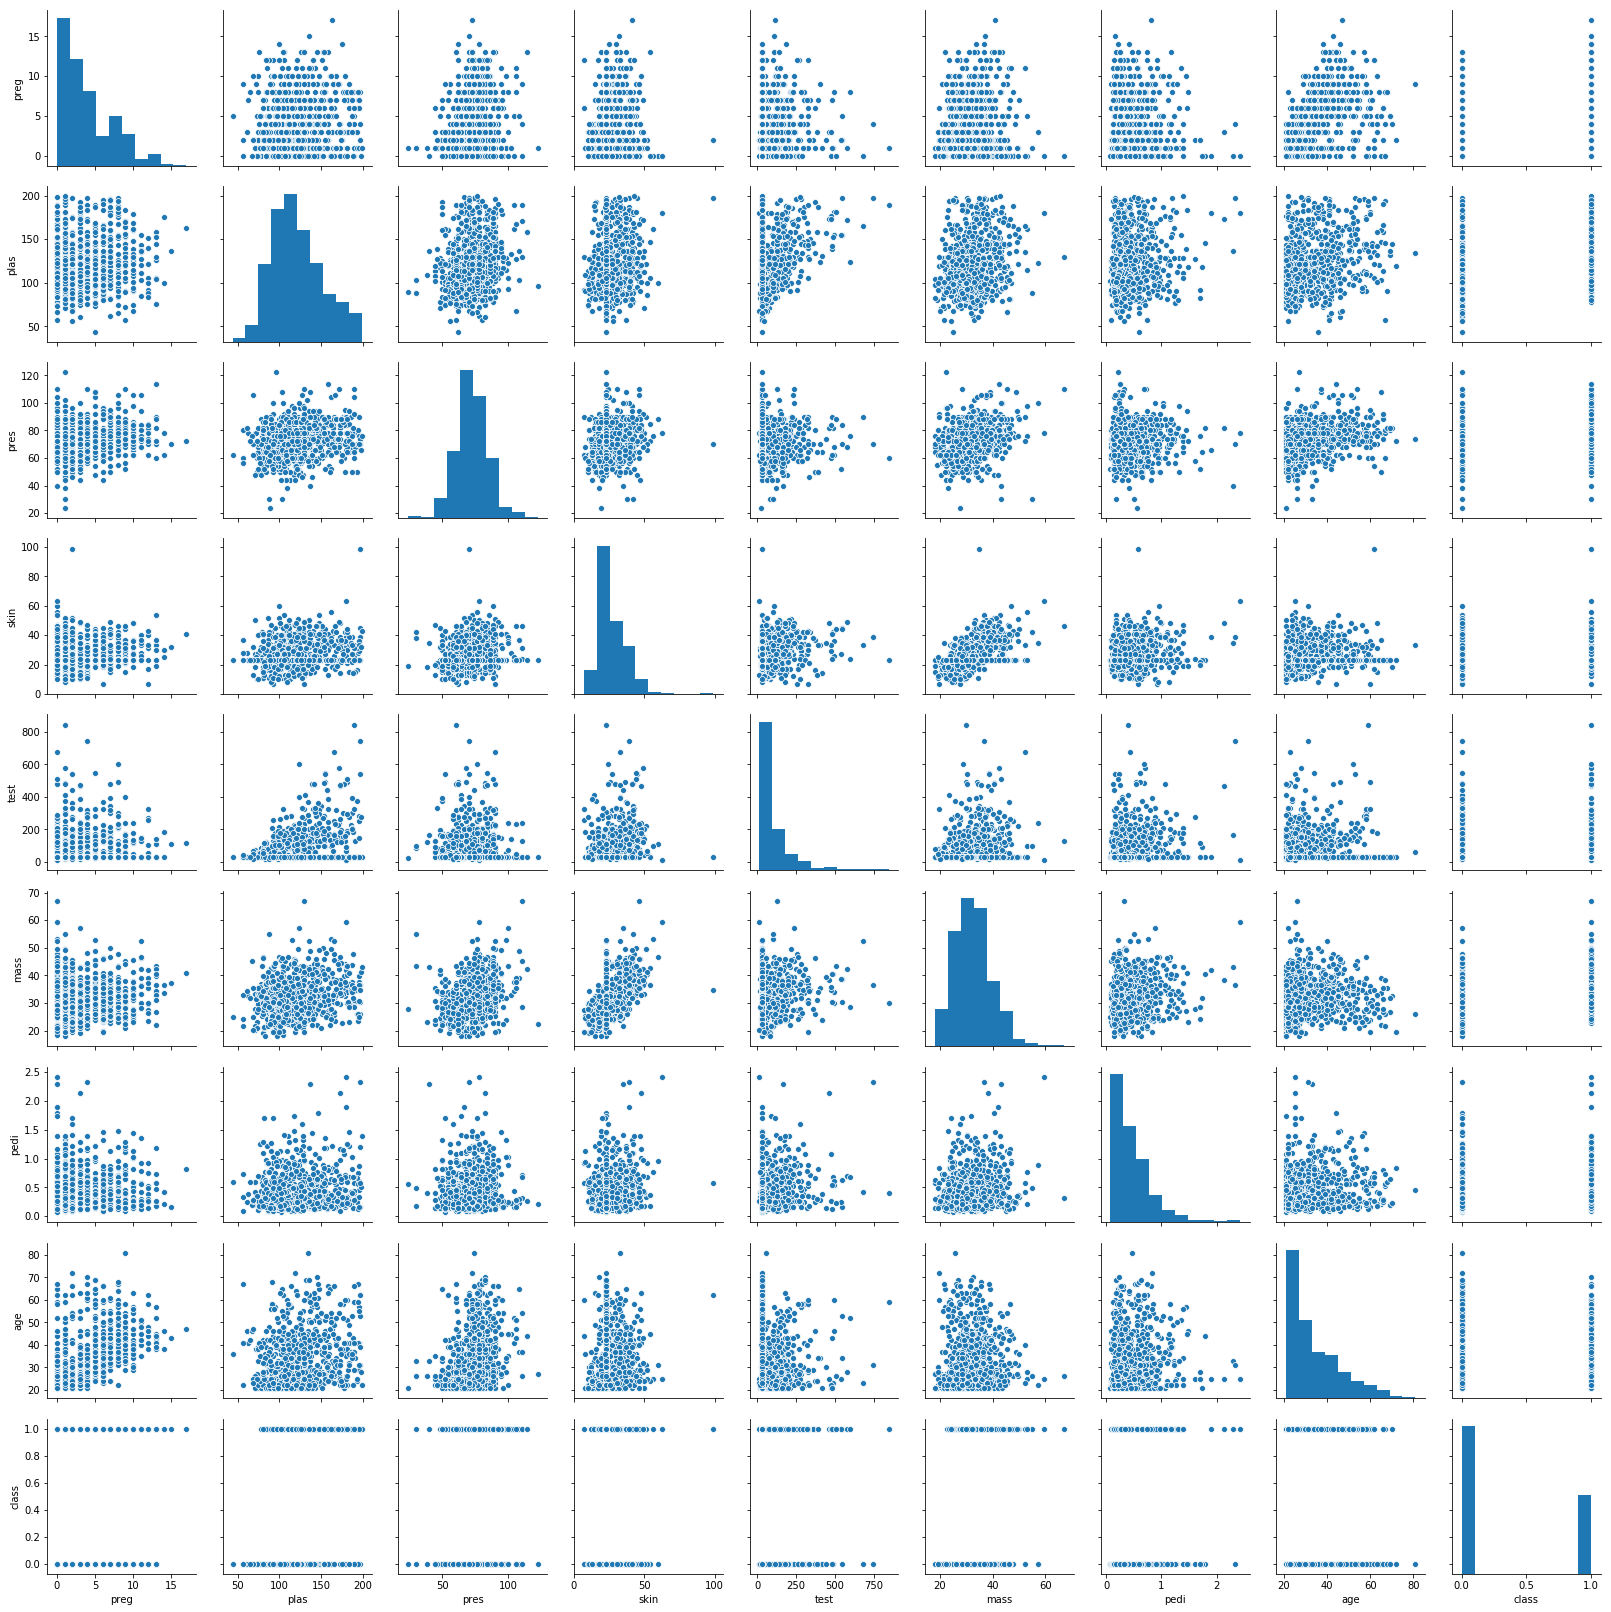

In [56]:
#Visualizing the data
sns.pairplot(pima_rev)

In [57]:
#Preparing model
pima_mod = pima_rev.copy() #Copying dataset

In [58]:
#Splitting data into dependant & independant variables
X = pima_mod.drop('class', axis = 1).values
X.shape

(768, 8)

In [59]:
Y = pima_mod['class'].values
Y.shape

(768,)

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 1)
Y_train.shape

(537,)

In [81]:
clt = GaussianNB()
clt.fit(X_train,Y_train)
y_predict = clt.predict(X_test)
accuracy_score(Y_test,y_predict,normalize=True)

0.7619047619047619

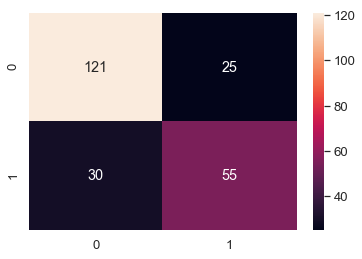

In [64]:
#Using Confusion Matrix for class prediction
sns.set(font_scale=1.2)
cm = metrics.confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [67]:
#Using above Confusion Matrix
#Recall non-diabetic: (TP/(TP+FN)) i.e. 123/(123+21) = 82.9%
121/(121+25)
#Recall Diabetic: (TP/(TP+FN)) i.e. 64.7% Model accuracy for diabetic
55/(55+30)

0.6470588235294118

In [68]:
################################# ITERATION - 3 ########################

Text(0.5,1,'Correlation between variables')

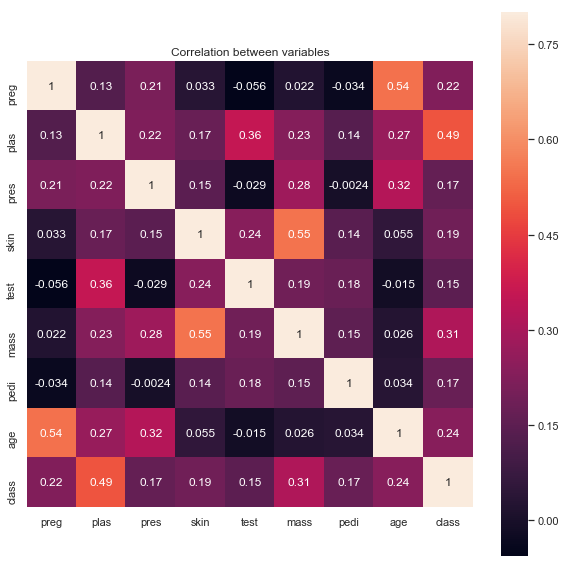

In [69]:
#Looking at correlation between variables
corr = pima_mod.corr()
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=0.8,annot=True,square=True)
plt.title('Correlation between variables')

In [70]:
#Except for plasma,none of the variable are strong predictor
#there is a strong corelation between skin & BMI, Age and pregnancy, plasma and test

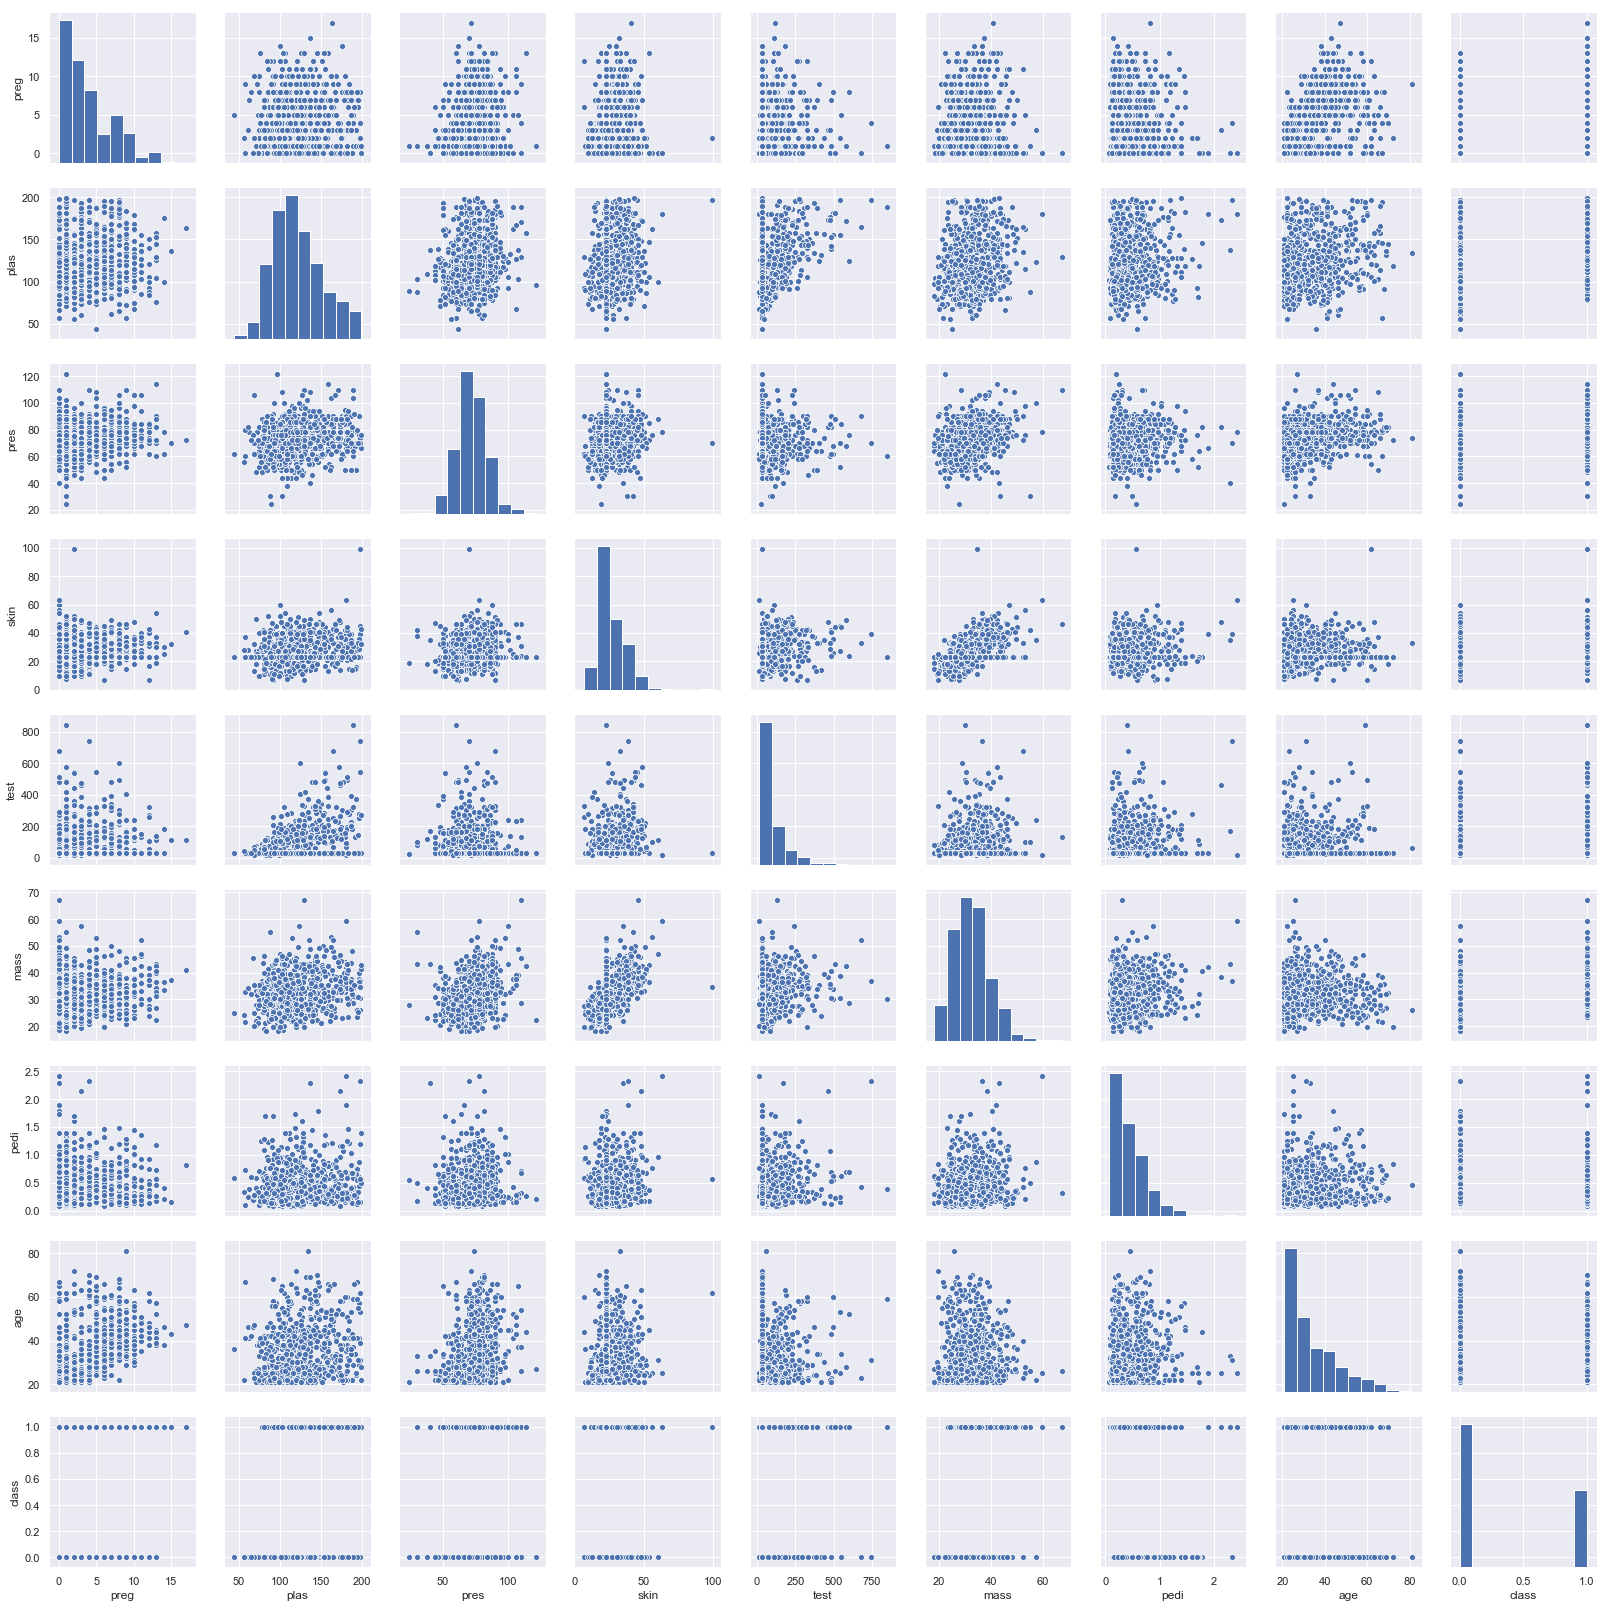

In [71]:
sns.pairplot(pima_mod)

In [72]:
#Dropping skin,age & test variable due to strong relation with other independent variables, making them redundent
X = pima_mod.drop(['skin','test','class','age'], axis = 1).values
X.shape

(768, 5)

In [73]:
Y = pima_mod['class'].values
Y.shape

(768,)

In [74]:
#Splitting into train & test dataset
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [75]:
clt.fit(x_train,y_train)
y_predict = clt.predict(x_test)
accuracy_score(y_test,y_predict,normalize=True)

0.7922077922077922

In [76]:
#After removing the 3 independant variables age, test and skin thickness, the multicolleniarity among predictors were reduced
#increasing the model overall accuracy to 79.2%

#Checking model accuracy with Confusion matrix
sns.set(font_scale=1)
cm = metrics.confusion_matrix(y_test,y_predict)
print(cm)

[[130  16]
 [ 32  53]]


In [77]:
#recall Diabetic: 54% which is slightly better than previous prediction of 62.4%
53/(53+32)

0.6235294117647059

In [78]:
#Recall for non-diabetic: 89%
130/(130+16)

0.8904109589041096

In [79]:
#We can conclude that prediction in iteration 2 with all the variables are most accurate with 64.7% for diabetic class and 
    #overall 76.19%
#Model with all the predictors are most accurate of the 3 prediction

In [80]:
##### THANK YOU #######